In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive/'

/content/drive/My Drive


In [0]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

In [4]:
reviews_df = pd.read_csv('Hotel_Reviews.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [0]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [0]:
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

In [0]:
cleaned_positive_reviews = [clean(r) for r in positive_reviews] 
cleaned_negative_reviews = [clean(r) for r in negative_reviews] 

In [0]:
reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [0]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(p)
    else : 
        reviews_text.append(n)
        reviews_text.append(p)

In [0]:
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

In [0]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [0]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [13]:
text_reviews = [str(r) for r in reviews_text_df['reviews_text'].values]

sentences = []

for review in text_reviews:
    words = text_to_word_sequence(review)
    sentences.append(words)

embeddings_model = Word2Vec(sentences, min_count=1, sg=1, size=128)
words = list(embeddings_model.wv.vocab)
print('{} WORDS '.format(len(words)))
print('Printing first 100:')
print(words[:100])

76904 WORDS 
Printing first 100:
['extremely', 'long', 'corridors', 'i', 'would', 'have', 'preffered', 'to', 'a', 'view', 'on', 'the', 'schonbrunn', 'gardens', 'instead', 'of', 'room', 'at', 'ground', 'floor', 'and', 'no', 'balcony', 'these', 'price', 'booked', 'deluxe', 'for', 'eur', 'night', 'without', 'breakfast', 'found', 'out', 'that', 'is', 'person', 'quite', 'expensive', 'plus', 'parking', 'day', 'so', 'total', 'not', 'very', 'close', 'city', 'center', 'subway', 'stations', 'about', 'one', 'hour', 'walk', 'nice', 'place', 'real', 'old', 'palace', 'near', 'by', 'entrance', 'with', 'last', 'ballroom', 'in', 'wien', 'staff', 'reception', 'bed', 'was', 'comfortable', 'shower', 'powerful', 'helpful', 'property', 'quirky', 'which', 'pleasant', 'but', 'can', 'cause', 'issues', 'rooms', 'are', 'clean', 'little', 'peeling', 'paint', 'detracts', 'bit', 'perfect', 'location', 'good', 'make', 'this', 'repeat', 'destination', 'my']


In [14]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

76905

In [15]:
vocabSize = len(tokenizer.word_index) + 1

# Recreating embeddings index based on Tokenizer vocabulary
word2vec_vocabulary = embeddings_model.wv.vocab
embeddingIndex = dict()
counter = 0
for word, i in tokenizer.word_index.items():
    if word in word2vec_vocabulary :
        embeddingIndex[word] = embeddings_model[word]
    else:
        counter += 1

print("{} words without pre-trained embedding!".format(counter))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


0 words without pre-trained embedding!


In [0]:
embeddingMatrix = zeros((vocabSize, 128))
for word, i in tokenizer.word_index.items():
    embeddingVector = embeddingIndex.get(word)
    if embeddingVector is not None:
        embeddingMatrix[i] = embeddingVector

In [0]:
reviews = [ str(r) for r in sentiment_df['reviews'].values]
labels = sentiment_df['labels'].values

for idx, review in enumerate(text_reviews):
    words = text_to_word_sequence(review)
    if(len(words) > 40): 
        words = words[:40]
        text_reviews[idx] = ' '.join(words)

oneHotReviews = tokenizer.texts_to_sequences(reviews)
encodedReviews = keras.preprocessing.sequence.pad_sequences(oneHotReviews, maxlen=40, padding='post')

X_train, X_test, y_train, y_test = train_test_split(encodedReviews, labels, test_size=0.33, random_state=42)

In [18]:
from tensorflow.keras.layers import Bidirectional,Conv1D,LSTM,MaxPooling1D,Dropout
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence
from tensorflow.keras import backend
maxlen=40
max_features=40000
batch_size=32

print('Pad sequences (samples x time)')
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Pad sequences (samples x time)
X_train shape: (11281, 40)
X_test shape: (5557, 40)


In [0]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [20]:
history=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[X_test, y_test])

Epoch 1/4
353/353 [==============================] - 40s 114ms/step - loss: 0.3074 - accuracy: 0.8728 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/4
353/353 [==============================] - 41s 115ms/step - loss: 0.1672 - accuracy: 0.9418 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/4
353/353 [==============================] - 39s 110ms/step - loss: 0.1282 - accuracy: 0.9561 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/4
353/353 [==============================] - 39s 111ms/step - loss: 0.1092 - accuracy: 0.9619 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [21]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

174/174 [==============================] - 2s 13ms/step - loss: 0.2488 - accuracy: 0.9129
Test score: 0.24877026677131653
Test accuracy: 0.9129026532173157


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


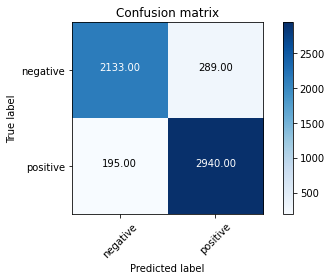

In [22]:
predictions = model.predict_classes(X_test)

cm = confusion_matrix(y_test, predictions, labels=[0,1])
title = 'Confusion matrix'
cmap = plt.cm.Blues
classes=["negative","positive"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [23]:
report = classification_report(y_test, predictions, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2422
           1       0.91      0.94      0.92      3135

    accuracy                           0.91      5557
   macro avg       0.91      0.91      0.91      5557
weighted avg       0.91      0.91      0.91      5557



In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, predictions,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.912903
Precision: 0.913368
Recall: 0.909238
F1 score: 0.911026


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
